In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from loader import *
import random
from kornia.geometry.transform import rescale
from kornia.utils import draw_convex_polygon
from shapely.geometry import Polygon

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
batch_size = 1
# train_loader, val_loader = get_icdar2015_loaders(batch_size=batch_size)
train_loader, val_loader = get_synthtext_loaders(batch_size=batch_size)

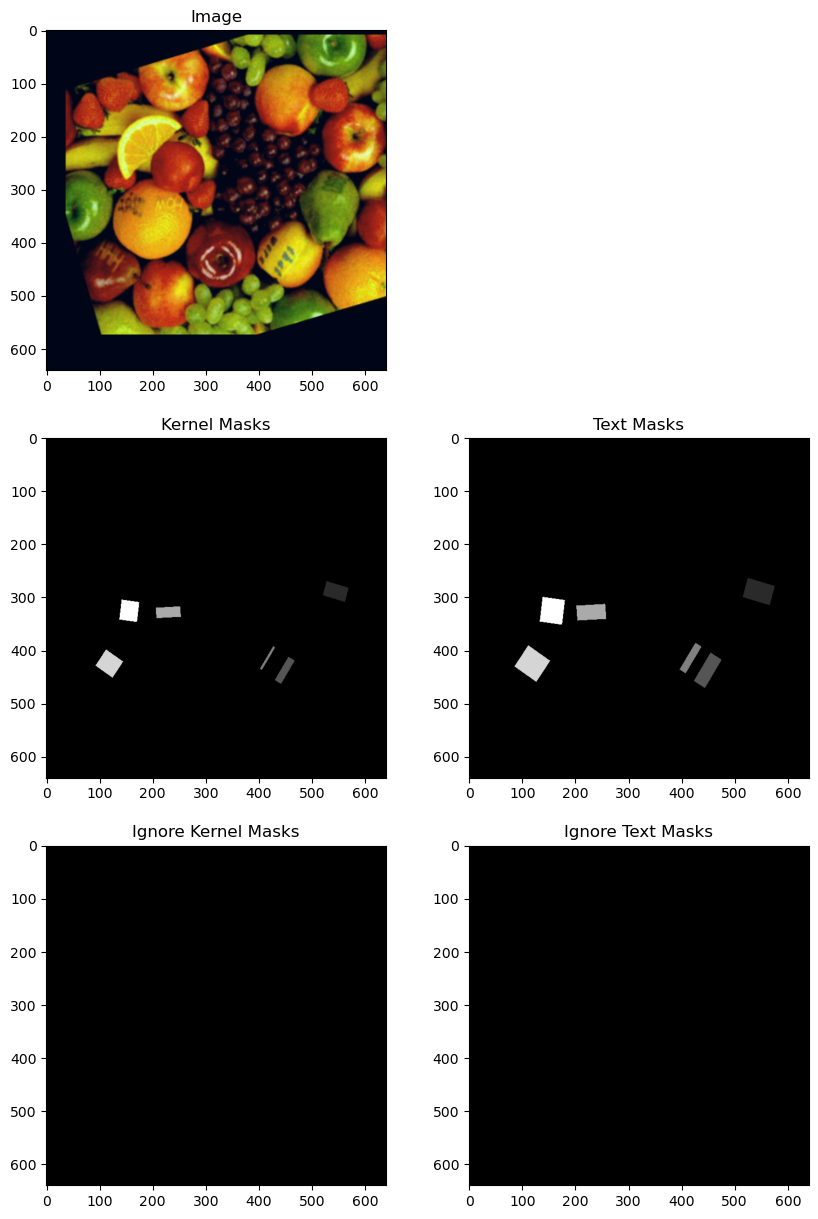

In [13]:
data = next(train_loader)
# data = next(val_loader)
image = data[0][0]
kernel_masks = data[1][0]
ignore_kernel_masks = data[2][0]
text_masks = data[3][0]
ignore_text_masks = data[4][0]

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.delaxes(axs[0][1])

# Display the image
image = (image - image.min()) / (image.max() - image.min())
axs[0][0].imshow(image.cpu().permute(1, 2, 0))
axs[0][0].set_title('Image')

# Display the kernel masks
axs[1][0].imshow(kernel_masks.cpu().numpy(), cmap='gray')
axs[1][0].set_title('Kernel Masks')

# Display the text masks
axs[1][1].imshow(text_masks.cpu().numpy(), cmap='gray')
axs[1][1].set_title('Text Masks')

# Display the ignore kernel masks
axs[2][0].imshow(ignore_kernel_masks.cpu().numpy(), cmap='gray')
axs[2][0].set_title('Ignore Kernel Masks')

# Display the ignore text masks
axs[2][1].imshow(ignore_text_masks.cpu().numpy(), cmap='gray')
axs[2][1].set_title('Ignore Text Masks')

plt.show()

In [6]:
image.std()

tensor(0.2505, device='cuda:0')

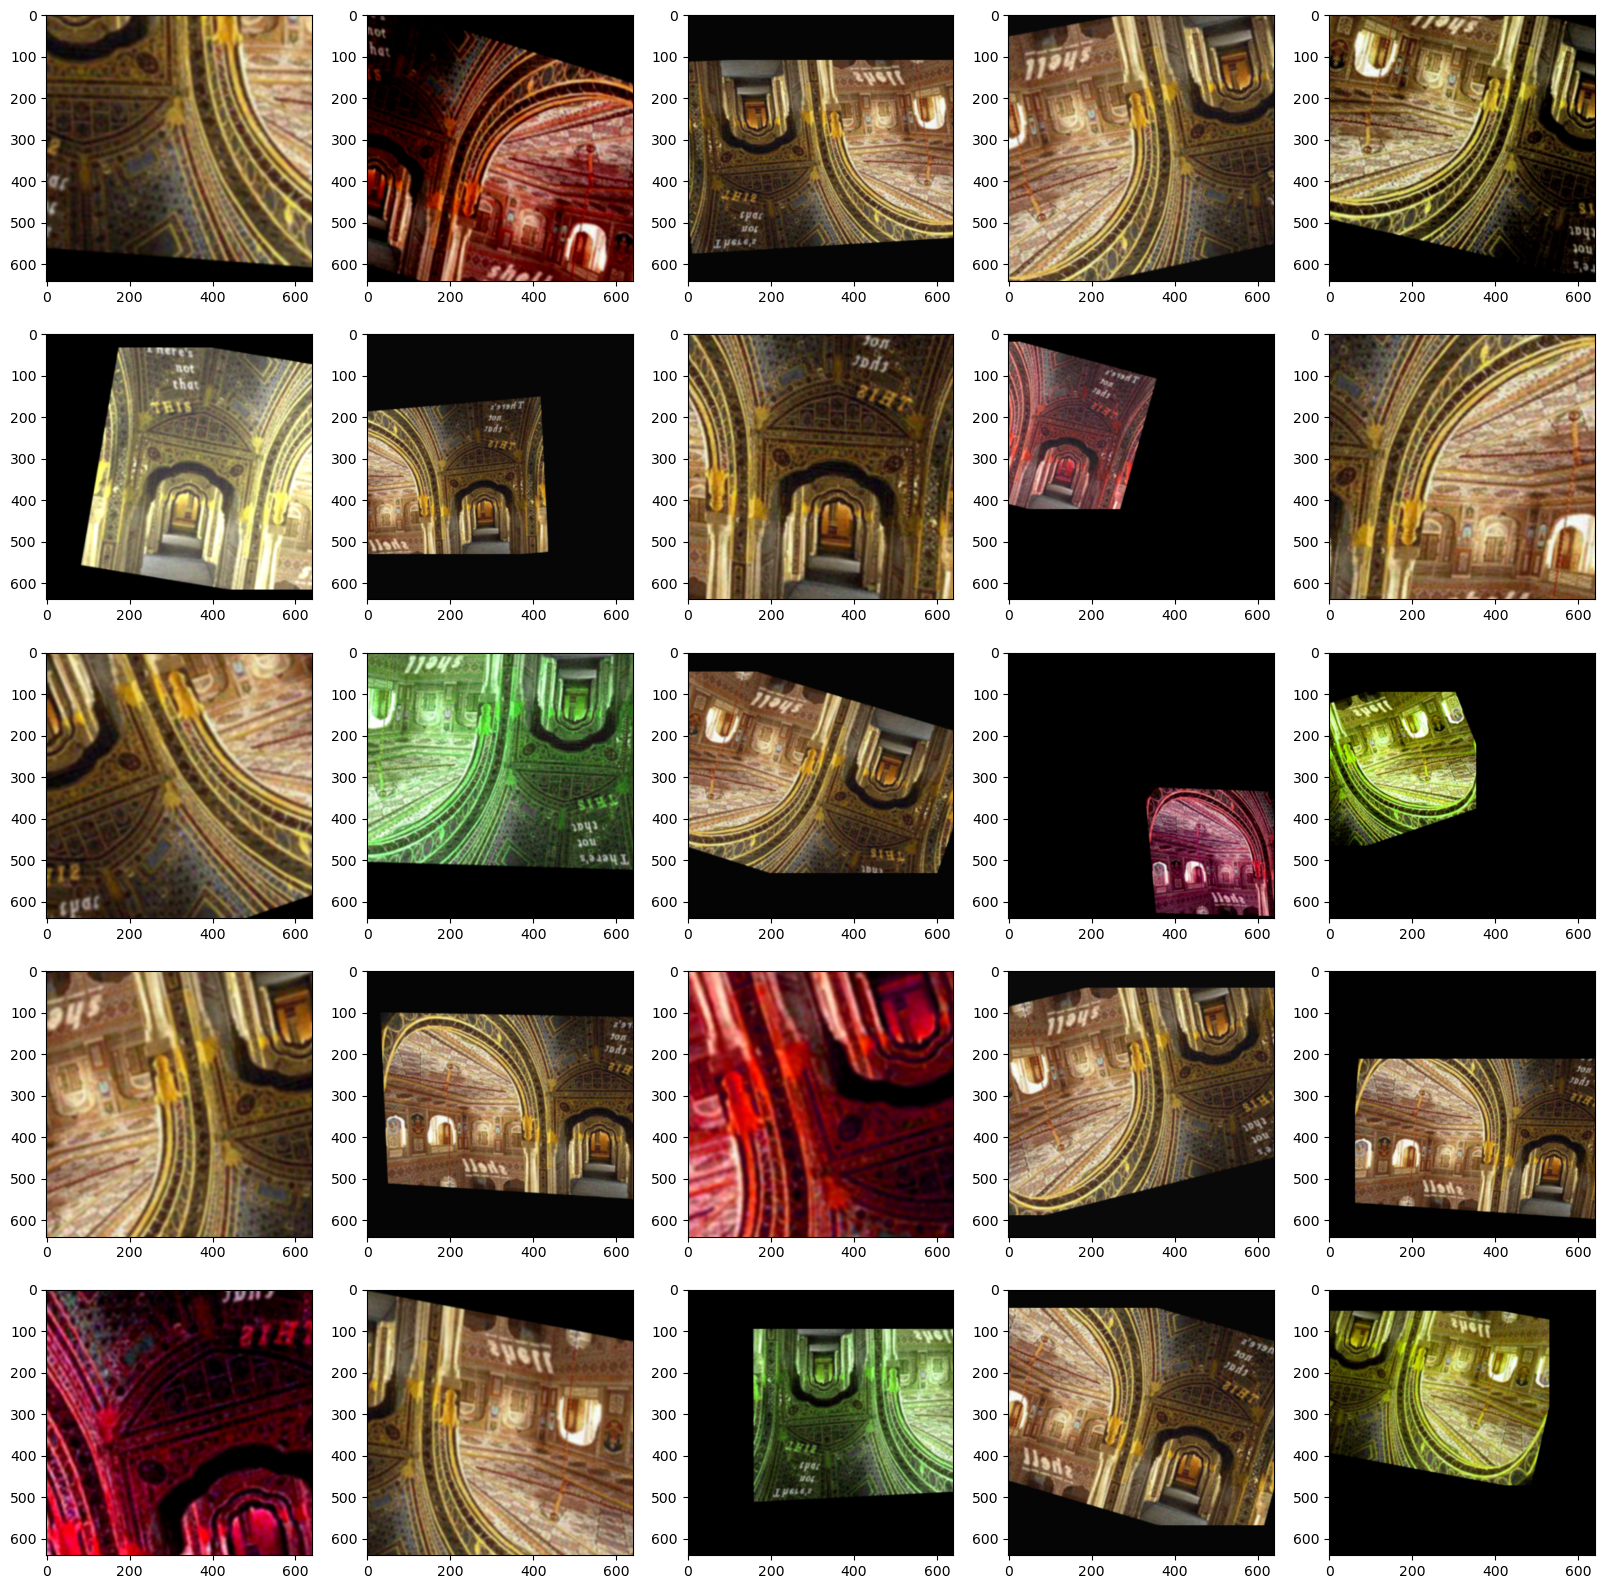

In [22]:
dset = FastDataset(
    "data/processed/synthtext/train", train=True, ignore=False, batch=False
)

fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        batch = dset[3]
        image = batch[0]
        image = (image - image.min()) / (image.max() - image.min())
        axs[i][j].imshow(image.cpu().permute(1, 2, 0))
plt.show()

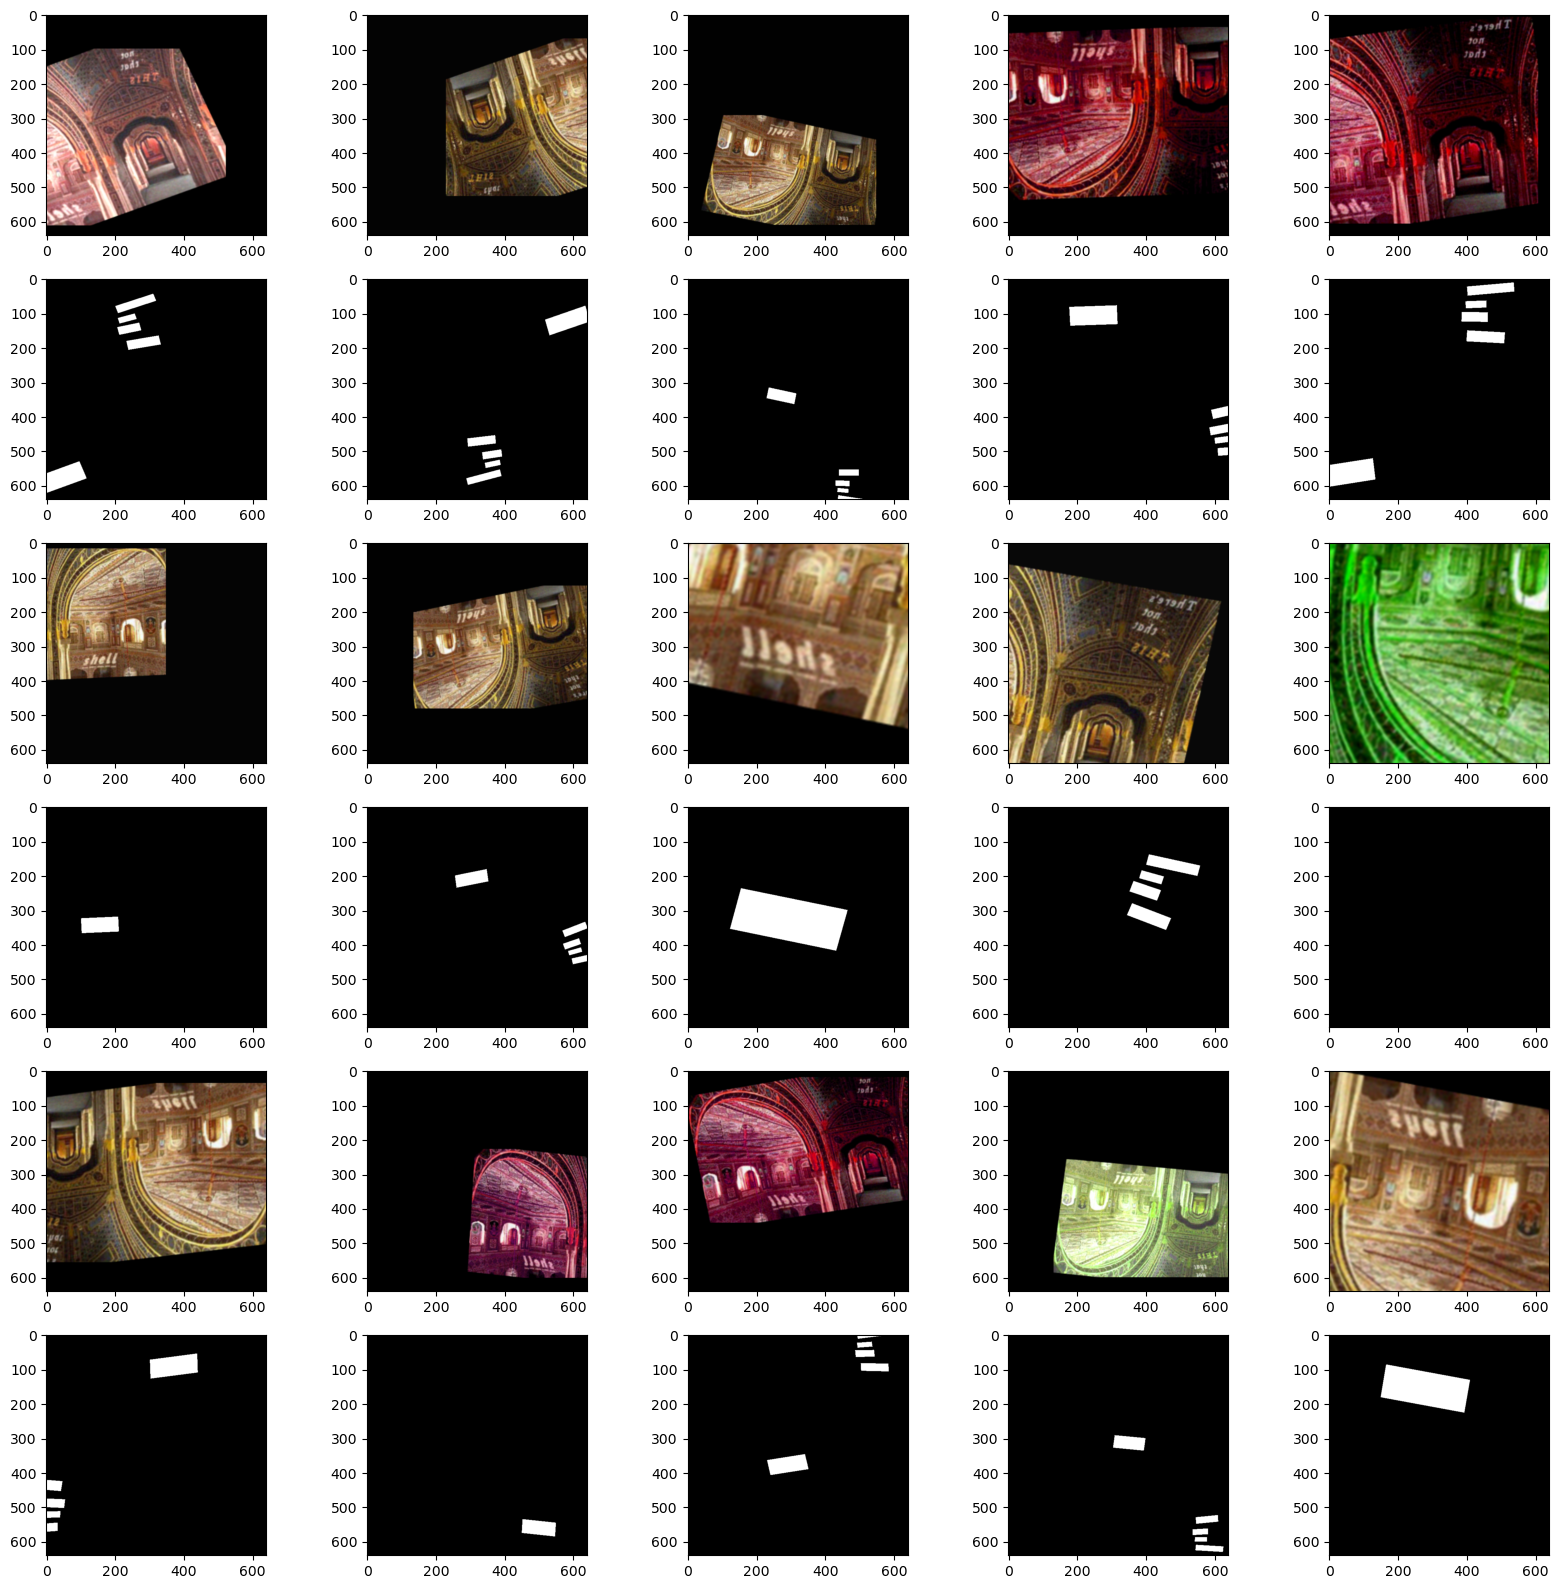

In [23]:
train_dataset = FastDataset(
"data/processed/synthtext/train", train=True, ignore=False, batch=False
)

fig, axs = plt.subplots(6, 5, figsize=(20, 20))
idx = 0
for i in range(5):
    for j in range(3):
        batch = train_dataset[3]
        img = batch[0]
        gt_text = torch.clamp(batch[3], 0, 1)
        img = (img - img.min()) / (img.max() - img.min())
        axs[2 * j][i].imshow(img.cpu().numpy().transpose(1, 2, 0))
        axs[2 * j + 1][i].imshow(gt_text.cpu().numpy(), vmin=0, vmax=1, cmap='gray')
plt.show()